In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

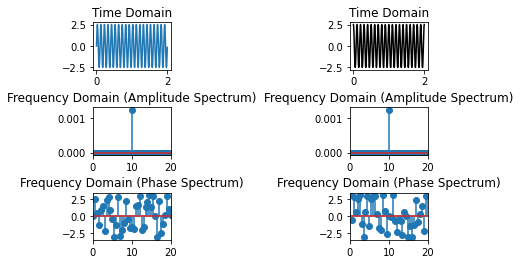

In [22]:
## same amplitude, different phase

# simulation parameters
srate = 1000
time  = np.arange(0.,2.,1/srate)
npnts = len(time)

# generate signal
signal1 = 2.5*np.sin(2*np.pi*10*time +   0  ) # different phase values
signal2 = 2.5*np.sin(2*np.pi*10*time + np.pi/2 )


# prepare the Fourier transform
fourTime = np.array(range(0,npnts)) / npnts
signal1X = np.zeros((len(signal1)),dtype=complex)
signal2X = np.zeros((len(signal2)),dtype=complex)

for fi in range(0,npnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    signal1X[fi] = np.sum( np.multiply(signal1,csw) ) / npnts
    signal2X[fi] = np.sum( np.multiply(signal2,csw) ) / npnts


# frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(npnts/2.)+1)

# extract correctly-normalized amplitude
signal1Amp = np.abs(signal1X[range(0,len(hz))]/npnts)
signal1Amp[1:] = 2*signal1Amp[1:]

signal2Amp = np.abs(signal2X[range(0,len(hz))]/npnts)
signal2Amp[1:] = 2*signal2Amp[1:]


# now extract phases
signal1phase = np.angle(signal1X[0:len(hz)])
signal2phase = np.angle(signal2X[0:len(hz)])


# plot time-domain signals
plt.subplot2grid((3,2),(0,0))
plt.plot(time,signal1)
plt.title("Time Domain")

plt.subplot2grid((3,2),(0,1))
plt.plot(time,signal2,'k')
plt.title("Time Domain")

plt.subplot2grid((3,2),(1,0))
plt.stem(hz,signal1Amp)
plt.xlim([0,20])
plt.title("Frequency Domain (Amplitude Spectrum)")

plt.subplot2grid((3,2),(1,1))
plt.stem(hz,signal2Amp)
plt.xlim([0,20])
plt.title("Frequency Domain (Amplitude Spectrum)")

plt.subplot2grid((3,2),(2,0))
plt.stem(hz,signal1phase)
plt.xlim([0,20])
plt.title("Frequency Domain (Phase Spectrum)")

plt.subplot2grid((3,2),(2,1))
plt.stem(hz,signal2phase)
plt.xlim([0,20])
plt.title("Frequency Domain (Phase Spectrum)")

plt.subplots_adjust(wspace=2.3, hspace =0.8)
plt.show()

They have exacly the same Frequency, same Amplitude Spectrum but not the Phase Spectrum.